## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1


Calculate (and ``print``) the value of the following summation, 
$$ \sum_{j=1}^{15} \cos \left( \frac{j \pi}{15} \right) $$
You must use a loop to perform the calculation (and ``np.cos( )``).

In [5]:
value = 0
for j in range(1,16):
    value = value + np.cos(((j*(np.pi))/15))
print (value)

-0.9999999999999993


Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``. 

# Question 2

**Plot**

The electric field of a wavepacket can be written as
$$E (t) = A e^{- \Delta^2 t^2} \cos(\omega t) ,$$
with $A = 5~{\rm N/C}$, $\Delta = 2~{\rm rad/s}$, and $\omega = 25~{\rm rad/s}$.  Please note that these units are purely for physical purposes, do not include them when you're trying to create the plot.  Make sure your work includes the following:

- Create a function whose input is ``t`` and whose output is $E(t)$ as described by the equation above.  (Note that ``np.cos()`` and ``np.exp()`` can be useful functions here.)
- Create a plot that includes 250 points between $t = -1$ and $t = 1~{\rm s}$.
- Include axis labels and include the fact that time is measured in seconds and $E$ is measured in N/C.


Text(0, 0.5, 'Energy (N/C)')

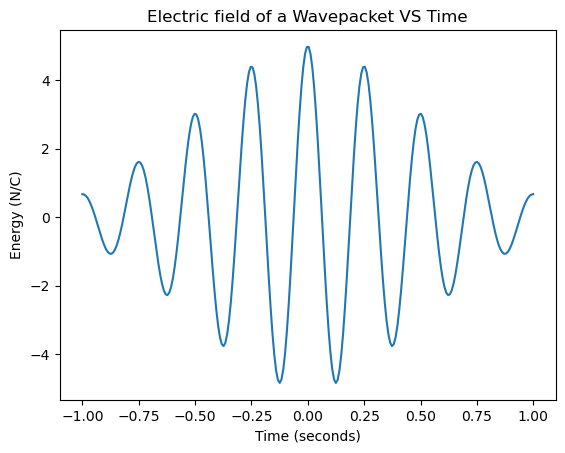

In [8]:
def e_field(t):
    return (5*np.exp(-2*(t**2)))*np.cos(25*t)

time_points = np.linspace(-1,1,250)
e_value = np.zeros(250)
for i in range(len(time_points)):
    e_value[i] = e_field(time_points[i])
 


plt.plot(time_points, e_value)
plt.title("Electric field of a Wavepacket VS Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Energy (N/C)")

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

# Question 3

**Error Bar Plot and Best Fit Line**

Take the data from ``ind-data.csv`` and do the following:
- Create a function that you will use to create the curve, $y(t) = 2 \sin (2t)$
- Create an error bar plot from the data file
- **on the same plot**, include the curve $y(t) = 2 \sin(2t)$ which includes times from t = 0 to 10 that is sufficiently smooth
- label the axes appropriately (with units)

Text(0, 0.5, 'Displacement (mm)')

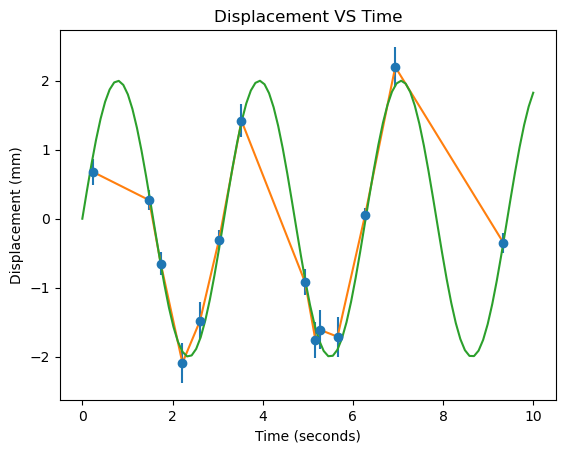

In [11]:
time, displace, uncert = np.loadtxt("ind-data.csv",delimiter=',',usecols=(0,1,2),unpack=True)


def curve(t):
    return 2*np.sin(2*t)
    
curve_time = np.linspace(0,10,100)   
curve_line = np.zeros(len(curve_time))


for i in range(len(curve_time)):
    curve_line[i] = curve(curve_time[i])


plt.errorbar(time, displace, uncert, fmt='o')
plt.plot(time, displace)
plt.plot(curve_time, curve_line)
plt.title("Displacement VS Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (mm)")


Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

# Question 4

**import a function and plot**

- Create a function
    - the input should be ``v0``
    - the function should use the function from the file, ``free_fall(t, v0)``, to create a plot of displacement vs. time
    - Your plot should be from t = 0 to 4 seconds, and should have enough points to clearly see the trajectory and create a smooth plot.
    - Make sure your axes are properly labeled.
- Use the function you created (you must use the function you created) to create two plots: one with ``v0 = 5`` and a second with ``v0 = 20``

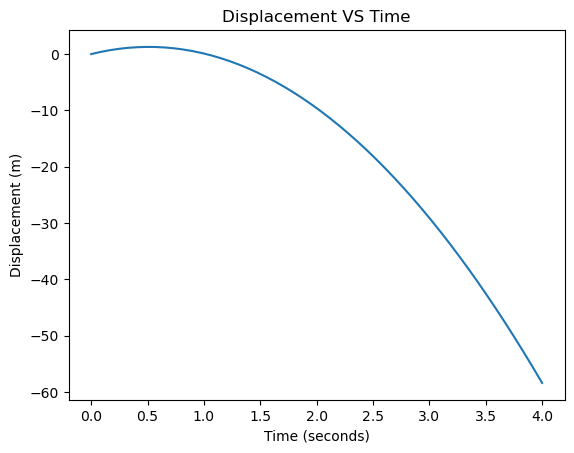

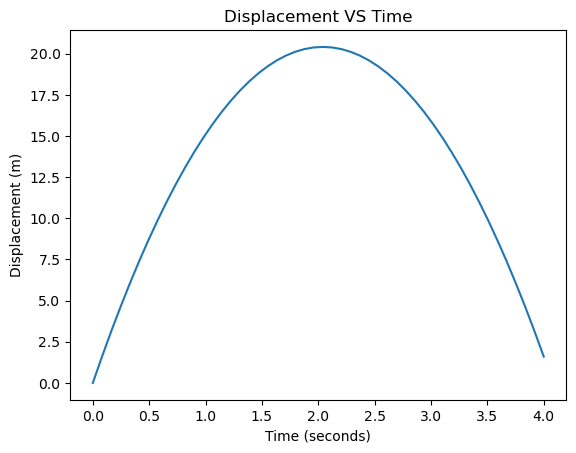

In [14]:
import individual as ind
time = np.linspace(0,4,50)
dist = np.zeros(len(time))
dist1 = np.zeros(len(time))
dist2 = np.zeros(len(time))

def fall_val(v0):
    for i in range(len(time)):
        dist[i] = ind.free_fall(time[i], v0)
    return dist

dist1 = fall_val(5)
plt.plot(time,dist1)
plt.title("Displacement VS Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (m)")
plt.show()

dist2 = fall_val(20)
plt.plot(time,dist2)
plt.title("Displacement VS Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (m)")   
plt.show()        

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

# Question 5

**Random numbers** 

- Create an array of random numbers, lets call it ``x``, which are a million random numbers between 0 and 1
- Create a second array of random numbers, lets call it ``y``, which are a **different** million random numbers between 0 and $2\pi$. To do this, ``2 * np.pi * rng.random(1000000)`` will work. The numbers need to be independent, so creating ``x`` and ``y`` requires two million random numbers.
- Create an array, call it ``r`` that is related to the array of ``x`` by the formula $r = 2 \sqrt{ - \ln(x) }$. To do this, ``np.sqrt()`` and ``np.log()`` are useful (*Note*: the function in Python isn't ln). Don't use a loop to do it, just create a formula with arrays that will take care of each term.
- Create an array, call it ``z`` that is related to our other arrays by $z = r \cos (y)$.
- Create a histogram of ``z``... this is our deliverable... ``z`` is an array of random numbers that have a standard normal (Gaussian with zero mean and unit standard deviation) distribution. Confirm this distribution to make sure your work is accurate.

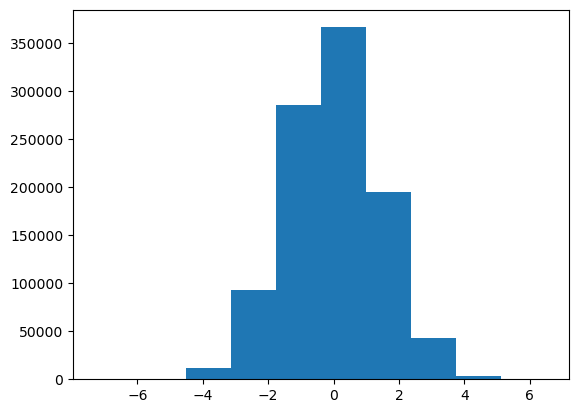

In [17]:
rng = np.random.default_rng()
x = rng.random(1000000)
y = 2 * np.pi * rng.random(1000000)
r = 2 * np.sqrt(-np.log(x))
z = r * np.cos(y)

plt.hist(z)
plt.show()

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

# Question 6
**Taking a slice** 

- Create an array, ``x``, of linearly spaced numbers between 0 and 10 with 1001 points
- Create a second array, ``y``, related to ``x`` by $y = 4 x^3$.
- We want to calculate $\int_1^2 y \, dx$. To do so, we want to use ``np.trapz( , )`` and slices of ``x`` and ``y``. 
    - use slices of ``y`` and ``x`` as the inputs to ``np.trapz()``
    - ``print`` the output and make sure we get the correct result. Please note that the trapezoid rule is an approximate method, so you're going to get a result that's really close, but not exact.

In [20]:
x = np.linspace(0,10,1001)
y = 4*x**3

val = np.trapz(y[100:201], x[100:201])
print(val)


15.000300000000001


Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

# Question 7
**Solve an ODE** (You are strongly encouraged to use your time-stepping function from Lab 8)

The equation of motion for the pendulum is
$$ \frac{d}{dt} \left( \begin{array}{c} \theta \\ \omega \end{array} \right) = \left( \begin{array}{c} \omega \\ - A \sin \theta \end{array} \right) $$
Here let's use $A = 4 \pi^2$ ``= 4 * np.pi**2`` and take the initial conditions $\theta_0 = 0.1$ and $\omega_0 = 0$.  You want to:

- Create a function that takes an array as input, e.g., ``x_in``, associating ``theta, omega = x_in``. Then the function should output the derivatives, whose two elements are $\omega$ and $- A \sin \theta$.
- Copy and paste the time-stepping function that you used in Lab 8 for solving the moon's orbit (it has a few lines: ``k1 =``, ``k2=``, ``x_final=``)
- Solve the differential equation using 5000 time points between 0 and 5.
- Set the initial conditions (``theta = 0.1``; ``omega = 0``).
- Solve the differential equation.
- Plot the solution for $\theta$ vs. time.  Label the axes appropriately (the units for $\theta$ are radians and the units for time is seconds).  This should look like a cosine function that undergoes five periods of oscillation.

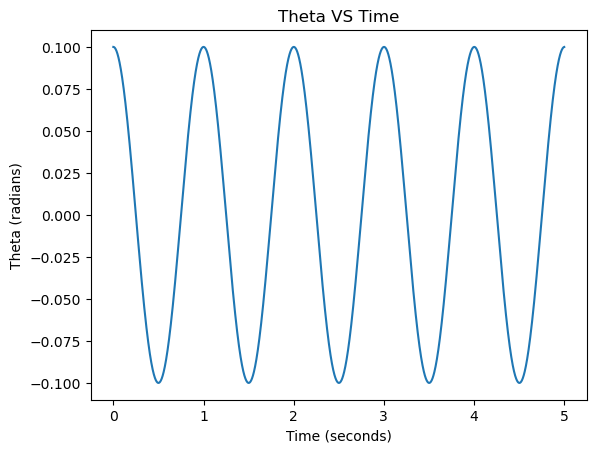

In [23]:
def pend_func(x_in):
    theta , omega = x_in
    derive = np.zeros(2)
    derive[:] = [omega, (-4*np.pi**2)*(np.sin(theta))]
    return derive
    
def time_step1(x_in, dts):
    k1 = pend_func(x_in) * dts
    k2 = pend_func(x_in + k1) * dts
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

times = np.linspace(0,5,5000)
dts = times[1] - times[0]
x_step = np.zeros(len(times))
y_step = np.zeros(len(times))

theta = 0.1
omega = 0

x_array = np.zeros(2)
x_array[:] = [theta, omega]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(times)):
    x_array = time_step1(x_array, dts)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]


    
plt.figure()
plt.plot(times, x_step)
plt.title("Theta VS Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Theta (radians)") 
plt.show()


Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``